In [ ]:
https://www.youtube.com/watch?v=ujId4ipkBio

In [8]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [9]:
my_consumer_key = ''      # your consumer key (string) goes in here
my_consumer_secret = ''   # your consumer secret key (string) goes in here
my_access_token = ''      # your access token (string goes in here
my_access_token_secret = ''  # your access token secret (string) goes in here

In [10]:
auth = tweepy.OAuthHandler(my_consumer_key, my_consumer_secret)
auth.set_access_token(my_access_token, my_access_token_secret)
api = tweepy.API(auth)

In [12]:
#extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = "BillGates", count = 100, lang = "en", tweet_mode="extended")



In [15]:
#Print the last 5 twees from the account
print("show the 5 recent tweets: \n")
i = 1 
for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i += 1

show the 5 recent tweets: 

1) RT @gatesfoundation: As our CEO @MSuzman says, no barriers should stand in the way of equitable access to vaccines. We are supportive of a…

2) https://t.co/padmHSgWGc

3) RT @WHO: The @ACTAccelerator, an unprecedented global alliance to develop &amp; deliver the tests, treatments &amp; vaccines the 🌐 needs to fight #…

4) I was honored to speak at today’s #LeadersClimateSummit about the three things we need to do to avoid a climate disaster. https://t.co/0YJJyabeIn

5) Ambitious short-term goals like this are critical to moving closer to a net-zero future. As we rapidly scale the solutions we have, we must also invest in innovation to reach our ultimate goals. Thank you @POTUS for your leadership. https://t.co/SVeKp1KPHT



In [26]:
#create a dataframe
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [22]:
posts[0]

Status(_api=<tweepy.api.API object at 0x15d568400>, _json={'created_at': 'Thu May 06 23:45:58 +0000 2021', 'id': 1390452813545697282, 'id_str': '1390452813545697282', 'full_text': 'RT @gatesfoundation: As our CEO @MSuzman says, no barriers should stand in the way of equitable access to vaccines. We are supportive of a…', 'truncated': False, 'display_text_range': [0, 139], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'gatesfoundation', 'name': 'Gates Foundation', 'id': 17899109, 'id_str': '17899109', 'indices': [3, 19]}, {'screen_name': 'MSuzman', 'name': 'Mark Suzman', 'id': 134871575, 'id_str': '134871575', 'indices': [32, 40]}], 'urls': []}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 50393960, 'id_str': '50393960', 'name': 'Bill Gates', 

In [27]:
#Clean the text
def cleanTxt(text): 
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r':', '', text)
    
    return text

In [28]:
df['Tweets'] = df['Tweets'].apply(cleanTxt)

In [29]:
# show the cleaned text
df

,Tweets
0,"As our CEO says, no barriers should stand in..."
1,
2,"The , an unprecedented global alliance to dev..."
3,I was honored to speak at today’s LeadersClima...
4,Ambitious short-term goals like this are criti...
...,...
95,Standing up for science has never been more im...
96,I've known and learned from for more than 40 ...
97,This book has nothing to do with viruses or pa...
98,Monoclonal antibodies are one of the most prom...


In [30]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#show the new dataframe with new columns
df

,Tweets,Subjectivity,Polarity
0,"As our CEO says, no barriers should stand in...",1.000000,0.500000
1,,0.000000,0.000000
2,"The , an unprecedented global alliance to dev...",0.450000,0.300000
3,I was honored to speak at today’s LeadersClima...,0.000000,0.000000
4,Ambitious short-term goals like this are criti...,0.668750,0.062500
...,...,...,...
95,Standing up for science has never been more im...,0.750000,0.450000
96,I've known and learned from for more than 40 ...,0.550000,0.425000
97,This book has nothing to do with viruses or pa...,0.966667,0.600000
98,Monoclonal antibodies are one of the most prom...,0.525714,0.222857


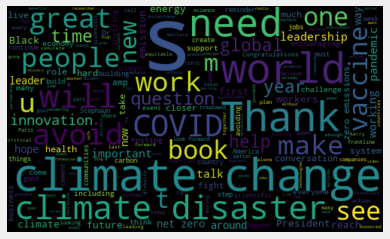

In [32]:
# Plot Word Cloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=1, max_font_size = 120).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [33]:
allWords

' As our CEO  says, no barriers should stand in the way of equitable access to vaccines. We are supportive of a…   The\xa0, an unprecedented global alliance\xa0to develop &amp; deliver the tests, treatments &amp; vaccines the 🌐 needs to fight … I was honored to speak at today’s LeadersClimateSummit about the three things we need to do to avoid a climate disaster.  Ambitious short-term goals like this are critical to moving closer to a net-zero future. As we rapidly scale the solutions we have, we must also invest in innovation to reach our ultimate goals. Thank you  for your leadership.  It’s encouraging to see  Biden and  Kerry re-establish America’s leading role on climate change. I look forward to joining leaders from around the world to talk about some of the most important challenges we need to overcome to avoid a climate disaster.  Yesterday\'s verdict was a step in the right direction. But one court ruling alone will not bring to an end the injustice and inequity that Black peop

In [34]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else: 
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [35]:
df

,Tweets,Subjectivity,Polarity,Analysis
0,"As our CEO says, no barriers should stand in...",1.000000,0.500000,Positive
1,,0.000000,0.000000,Neutral
2,"The , an unprecedented global alliance to dev...",0.450000,0.300000,Positive
3,I was honored to speak at today’s LeadersClima...,0.000000,0.000000,Neutral
4,Ambitious short-term goals like this are criti...,0.668750,0.062500,Positive
...,...,...,...,...
95,Standing up for science has never been more im...,0.750000,0.450000,Positive
96,I've known and learned from for more than 40 ...,0.550000,0.425000,Positive
97,This book has nothing to do with viruses or pa...,0.966667,0.600000,Positive
98,Monoclonal antibodies are one of the most prom...,0.525714,0.222857,Positive


In [43]:
df['Analysis'].value_counts()

Positive    69
Neutral     17
Negative    14
Name: Analysis, dtype: int64

In [44]:
# print all of the positive tweets
j = 1 
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):       
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j += 1

1)  As our CEO  says, no barriers should stand in the way of equitable access to vaccines. We are supportive of a…

2)  The , an unprecedented global alliance to develop &amp; deliver the tests, treatments &amp; vaccines the 🌐 needs to fight …

3) Ambitious short-term goals like this are critical to moving closer to a net-zero future. As we rapidly scale the solutions we have, we must also invest in innovation to reach our ultimate goals. Thank you  for your leadership. 

4) It’s encouraging to see  Biden and  Kerry re-establish America’s leading role on climate change. I look forward to joining leaders from around the world to talk about some of the most important challenges we need to overcome to avoid a climate disaster. 

5) Yesterday's verdict was a step in the right direction. But one court ruling alone will not bring to an end the injustice and inequity that Black people experience daily.  I hope we will continue to make real progress on this.

6) “Time” is a poetic portrait of 

In [46]:
# print all of the negative tweets
j = 1 
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Negative'):       
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j += 1

1) Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail Black and brown people is because it’s not designed with them in mind. Dr. Stephaun Wallace wants to change that. 

2) Dr. Stephaun Wallace () has spent the last year helping make COVID-19 vaccines work for everybody. Stephaun and his colleagues at  are working to reach the people who are usually left behind. 

3) It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects  

4)  Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…

5) For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of vaccines to prevent suffering and save lives. 

6)  Black folks have questions about the COVID-19 v

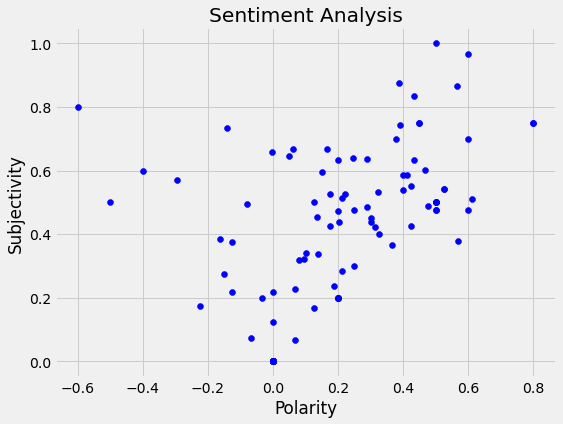

In [47]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [49]:
# get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0])*100, 1)


69.0

In [50]:
# get the percentage of negative tweets
ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0])*100, 1)


14.0

<AxesSubplot:>

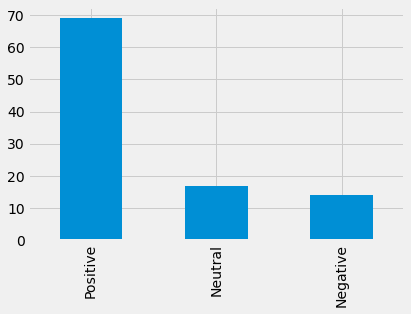

In [51]:
df['Analysis'].value_counts().plot(kind='bar')

